<a href="https://colab.research.google.com/github/melihilerialkan/BachelorFingerprintVollstaendigung/blob/main/vollstaendigung.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import os
from glob import glob
import scipy.misc
import cv2
import numpy as np
import pandas as pd
from PIL import Image
from keras import backend as K
from keras import losses
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from keras.layers import Input, MaxPooling2D
from keras.layers import concatenate, Conv2D, Conv2DTranspose, Dropout, LeakyReLU, PReLU, ReLU
from keras.models import Model
from keras.activations import relu
from keras.optimizers import Adam
from numpy import random
from sklearn.model_selection import KFold
from skimage.transform import resize
from sklearn.model_selection import train_test_split

In [3]:
import keras
from matplotlib import pyplot as plt
import numpy as np
import gzip
%matplotlib inline
from keras.layers import Input,Conv2D,MaxPooling2D,UpSampling2D
from keras.models import Model
from keras.optimizers import RMSprop
from keras.layers.normalization import BatchNormalization

In [4]:
img_size = 400
#Function to iterate through all the images
def datenladen(path):
    data = []
    for i in range (400):
        try:
            
            img= cv2.imread(path[i], cv2.IMREAD_GRAYSCALE)
            img_last = cv2.resize(img, (img_size, img_size))
            data.append([img_last])
        except Exception as e:
            pass
    
    return data

In [5]:
data = glob("/content/drive/MyDrive/anguli/*")

In [6]:
data = sorted(data)

In [7]:
altered = datenladen(data)
X = np.array(altered).reshape(-1, img_size, img_size, 1)
X = X / 255.0
del altered

In [8]:
real_path = glob("/content/drive/MyDrive/realanguli/*")

In [9]:
real_path = sorted(real_path)

In [10]:
real = datenladen(real_path)
y_real= np.array(real).reshape(-1, img_size, img_size, 1)
y_real = y_real / 255.0
del real

In [11]:
batch_size = 64
epochs = 200
z = 1
x, y = img_size, img_size
input= Input(shape = (x, y, z))

In [12]:
def model(input):
    
    conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(input)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
    conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(pool1)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
    conv3 = Conv2D(128, (3, 3), activation='relu', padding='same')(pool2) 
    
    conv4 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv3)
    up1 = UpSampling2D((2,2))(conv4)
    conv5 = Conv2D(64, (3, 3), activation='relu', padding='same')(up1)
    up2 = UpSampling2D((2,2))(conv5)
    model = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(up2)
    return model

In [13]:
model = Model(input, model(input))
model.compile(loss='mean_squared_error', optimizer = Adam())

In [14]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 400, 400, 1)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 400, 400, 32)      320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 200, 200, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 200, 200, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 100, 100, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 100, 100, 128)     73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 100, 100, 128)     147584

In [15]:
from sklearn.model_selection import train_test_split
X_train,X_valid,y_train,y_valid = train_test_split(X,y_real,test_size=0.2)

In [16]:
model_result = model.fit(X_train, y_train, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(X_valid, y_valid))

Epoch 1/200
5/5 [==============================] - 64s 2s/step - loss: 0.1653 - val_loss: 0.1292
Epoch 2/200
5/5 [==============================] - 6s 1s/step - loss: 0.1212 - val_loss: 0.1127
Epoch 3/200
5/5 [==============================] - 6s 1s/step - loss: 0.1100 - val_loss: 0.1059
Epoch 4/200
5/5 [==============================] - 6s 1s/step - loss: 0.1037 - val_loss: 0.1004
Epoch 5/200
5/5 [==============================] - 6s 1s/step - loss: 0.0973 - val_loss: 0.0905
Epoch 6/200
5/5 [==============================] - 6s 1s/step - loss: 0.0887 - val_loss: 0.0837
Epoch 7/200
5/5 [==============================] - 6s 1s/step - loss: 0.0806 - val_loss: 0.0733
Epoch 8/200
5/5 [==============================] - 6s 1s/step - loss: 0.0696 - val_loss: 0.0570
Epoch 9/200
5/5 [==============================] - 6s 1s/step - loss: 0.0526 - val_loss: 0.0444
Epoch 10/200
5/5 [==============================] - 6s 1s/step - loss: 0.0428 - val_loss: 0.0392
Epoch 11/200
5/5 [====================

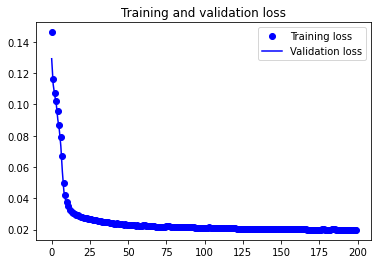

In [17]:
loss = model_result.history['loss']
val_loss = model_result.history['val_loss']
epochs = range(200)
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [18]:
pred = model.predict(X_valid)

Test Images


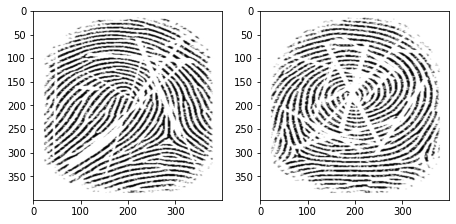

Reconstruction of Test Images


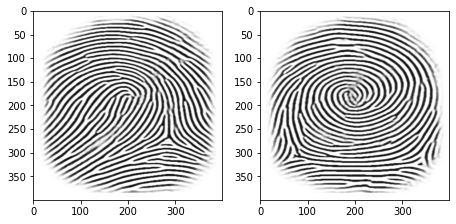

In [19]:
plt.figure(figsize=(40, 40))
print("Test Images")
for i in range(2):
    plt.subplot(1, 10, i+1)
    plt.imshow(X_valid[i, ..., 0], cmap='gray')
plt.show()    
plt.figure(figsize=(40, 40))
print("Reconstruction of Test Images")
for i in range(2):
    plt.subplot(1, 10, i+1)
    plt.imshow(pred[i, ..., 0], cmap="gray")  
plt.show()

Testbilder


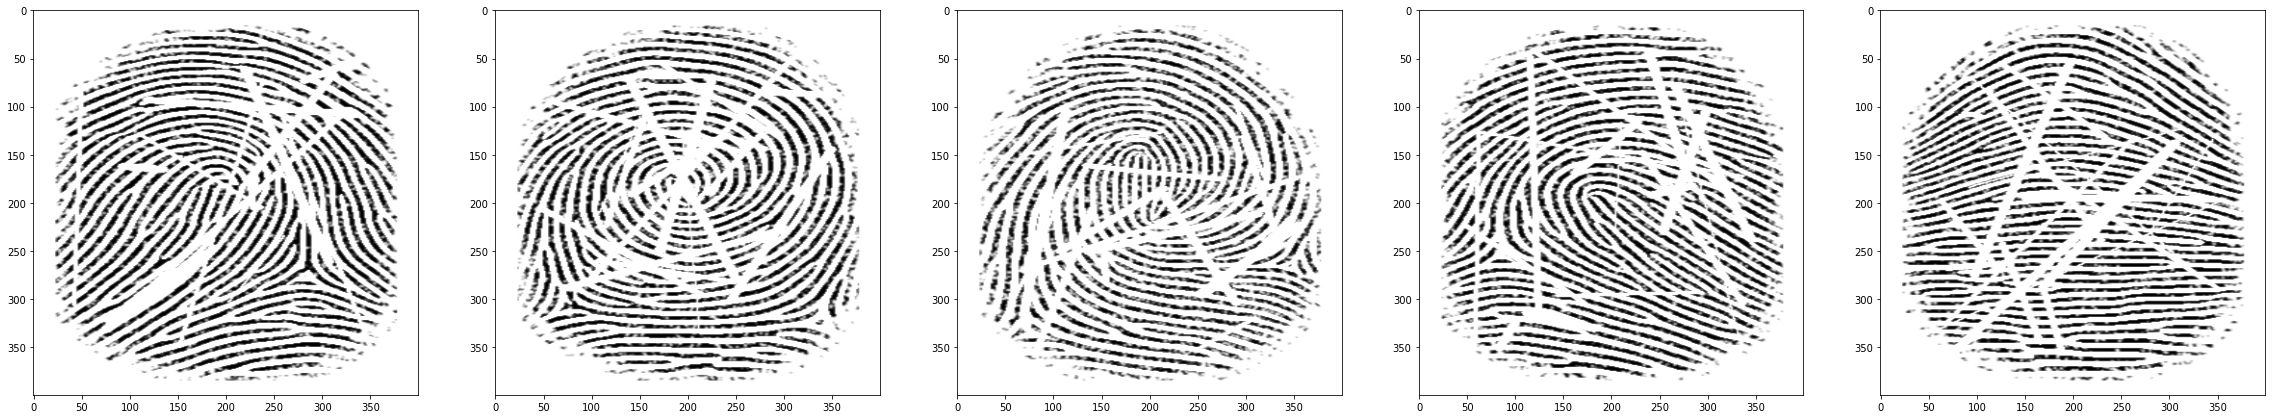

Testlabel


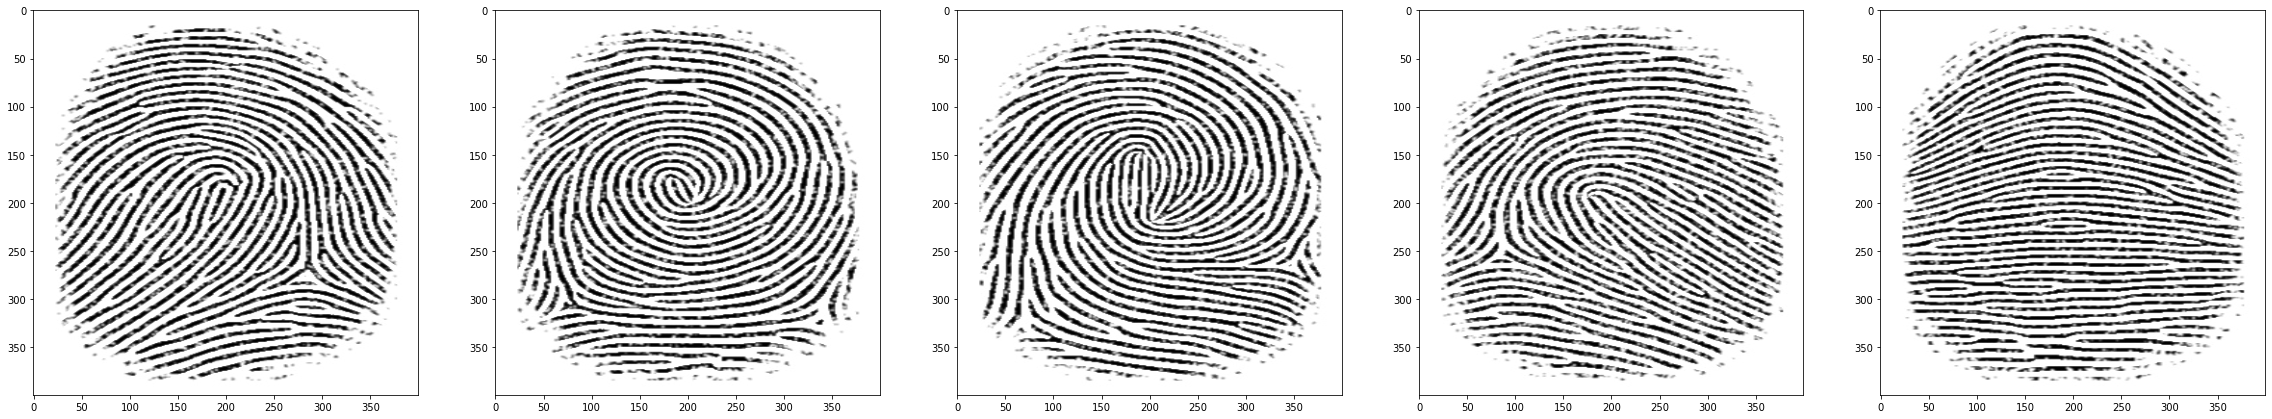

Rekonstruktion von Testbildern


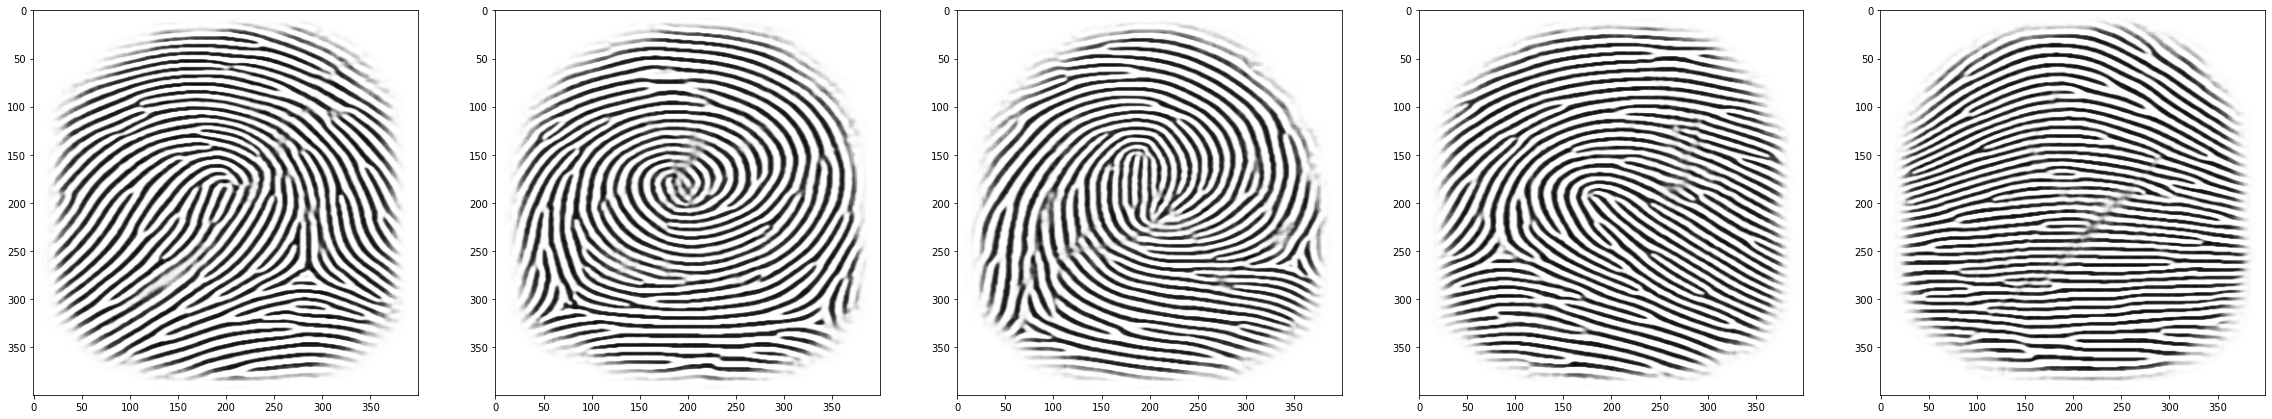

In [23]:
plt.figure(figsize=(40, 40))
print("Testbilder")
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(X_valid[i, ..., 0], cmap='gray')
plt.show()  
plt.figure(figsize=(40, 40))
print("Testlabel")
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(y_valid[i, ..., 0], cmap='gray')
plt.show()    
plt.figure(figsize=(40, 40))
print("Rekonstruktion von Testbildern")
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(pred[i, ..., 0], cmap="gray")  
plt.show()